<a href="https://colab.research.google.com/github/DrKamaleshR/Customersegmentation-unsupervised/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
CS = pd.read_excel('/content/drive/My Drive/almabetter projects/Customer Segmentation/DataResources/Online Retail.xlsx')

In [4]:
CS.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
CS.shape

(541909, 8)

In [7]:
CS.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### **EDA**

In [8]:
#checking for null values
CS.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

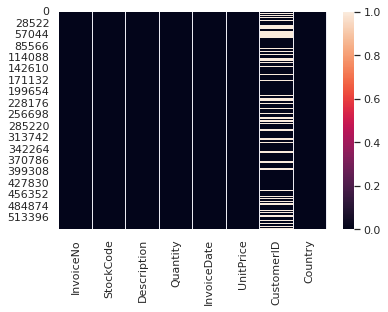

In [9]:
#visualising null values
sns.heatmap(CS.isnull())

About 24.93% customer IDs are missing in the dataset and 0.27% product descriptions are missing these features cannot be imputed as they are unique for each customer, so we have to drop these variable values.

In [10]:
CS.dropna(axis = 0, inplace = True)
CS.shape

(406829, 8)

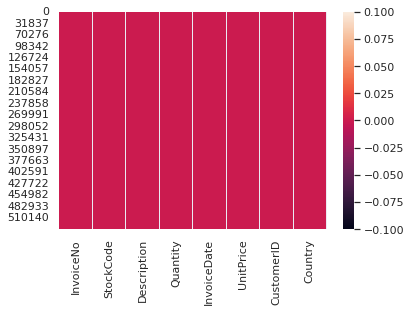

In [11]:
sns.heatmap(CS.isnull())

In [12]:
CS.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
CS.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
#we need to drop produsts which are cancelled from the dataset. Cancelled data can be identified as "InvoiceNo" starting with 'C'.
CS['InvoiceNo'] = CS['InvoiceNo'].astype('str')
CS2=CS[~CS['InvoiceNo'].str.contains('C')]

In [18]:
CS2.shape

(397924, 8)

We can split 'InvoiceDate' variable as 'Iyear','Imonth','Iday'and'Ihour'. 

In [20]:
CS2["Invoice_Year"] = CS2['InvoiceDate'].dt.year
CS2['Invoice_Month'] = CS2['InvoiceDate'].dt.strftime('%B')
CS2['Invoice_Day'] = CS2['InvoiceDate'].dt.strftime('%A')
CS2['Invoice_Hour'] = CS2['InvoiceDate'].dt.hour

In [29]:
#We have the 'UnitPrice' and 'Quantity', through this we can calculate the 'TotalExpenditure' of each Invoice.
CS2['TotalExpenditure']=CS2['Quantity']*CS2['UnitPrice'] 

In [30]:
CS2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,TotalExpenditure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [31]:
CS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         397924 non-null  object        
 1   StockCode         397924 non-null  object        
 2   Description       397924 non-null  object        
 3   Quantity          397924 non-null  int64         
 4   InvoiceDate       397924 non-null  datetime64[ns]
 5   UnitPrice         397924 non-null  float64       
 6   CustomerID        397924 non-null  float64       
 7   Country           397924 non-null  object        
 8   Invoice_Year      397924 non-null  int64         
 9   Invoice_Month     397924 non-null  object        
 10  Invoice_Day       397924 non-null  object        
 11  Invoice_Hour      397924 non-null  int64         
 12  TotalExpenditure  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memor

In [28]:
CS2.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Year,Invoice_Hour
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,2010.934259,12.728247
std,180.420210,22.096788,1713.169877,0.247829,2.273535
min,1.000000,0.000000,12346.000000,2010.000000,6.000000
25%,2.000000,1.250000,13969.000000,2011.000000,11.000000
50%,6.000000,1.950000,15159.000000,2011.000000,13.000000
75%,12.000000,3.750000,16795.000000,2011.000000,14.000000
max,80995.000000,8142.750000,18287.000000,2011.000000,20.000000


Lets find out top 10